# TensorFlow 2 quickstart for beginners

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Build a neural network that classifies images.
2. Train this neural network.
3. And, finally, evaluate the accuracy of the model.

#  What is TensorFlow ?
TensorFlow is a library for numerical computation where data flows through the graph.  Data in TensorFlow is represented by n-dimensional arrays called Tensors. Graph is made of data(Tensors) and mathematical operations. 

    Nodes on the graph: represent mathematical operations. 

    Edges on the graph: represent the Tensors that flow between operations.

## Download and install TensorFlow 2. Import TensorFlow into your program:

Note: Upgrade `pip` to install the TensorFlow 2 package. See the [install guide](https://www.tensorflow.org/install) for details.

#### pip install tensorflow

In [3]:
import tensorflow as tf
print("tensorflow version: ",tf.__version__),

tensorflow version:  2.2.0


(None,)

# Tensor in TensorFlow

TF holds data in Tensors which are similar to numPy multi-dimensional arrays(although they are different from numPy Arrays):

# Hello world for Deeplearning
#### Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the samples from integers to floating-point numbers:

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


### Shape of x_train x_test

In [38]:
print("x_train shape  ",x_train.shape)
print("x_test shape  ",x_test.shape)

x_train shape   (60000, 28, 28)
x_test shape   (10000, 28, 28)


# How look like MNIST

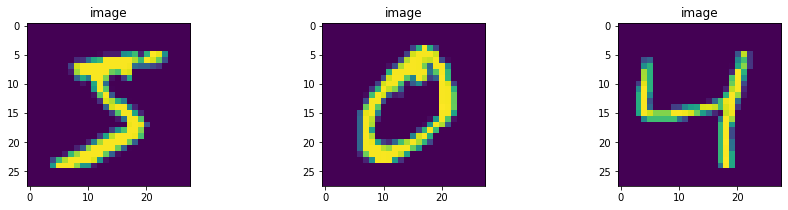

In [39]:
from matplotlib import pyplot as plt
import numpy as np
images=[np.array(i, dtype='float').reshape((28, 28)) for i in x_train[:3]]

fig, axs = plt.subplots(1, 3, figsize=(15, 3))
for ax, img in zip(axs, images):
    ax.imshow(img)
    ax.set_title("image")


plt.show()

### Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

### For each example the model returns a vector of "[logits](https://developers.google.com/machine-learning/glossary#logits)" or "[log-odds](https://developers.google.com/machine-learning/glossary#log-odds)" scores, one for each class.

In [6]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.56840575,  0.15192452,  0.01306346,  0.32200953, -0.33180037,
         0.22796029,  0.09066813, -0.03549707,  0.06434337, -0.00389459]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to "probabilities" for each class: 

In [7]:
tf.nn.softmax(predictions).numpy()

array([[0.05542446, 0.11390346, 0.09913576, 0.1350218 , 0.07021952,
        0.12290197, 0.10713556, 0.09443669, 0.10435203, 0.09746879]],
      dtype=float32)

Note: It is possible to bake this `tf.nn.softmax` in as the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to
provide an exact and numerically stable loss calculation for all models when using a softmax output. 

The `losses.SparseCategoricalCrossentropy` loss takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class:
It is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.log(1/10) ~= 2.3`.

In [46]:
loss_fn(y_train[:1], predictions).numpy()

2.0963683

In [10]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

The `Model.fit` method adjusts the model parameters to minimize the loss: 

In [11]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2929 - accuracy: 0.9149
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1391 - accuracy: 0.9593
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1068 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0872 - accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0719 - accuracy: 0.9772


The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [44]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0717 - accuracy: 0.9768


[0.0717281773686409, 0.9768000245094299]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [13]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [40]:
probability_model(x_test[:1])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[6.0112282e-10, 1.0009136e-08, 2.0654284e-06, 1.0391377e-05,
        3.2097554e-11, 5.0968318e-09, 6.2538267e-13, 9.9998641e-01,
        4.2431494e-09, 1.2375556e-06]], dtype=float32)>